In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Using the famous titanic dataset
df = sns.load_dataset('titanic')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<h4>Some Variable descriptions</h4>

* Pclass = Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival =  Survival (0 = No; 1 = Yes)
* name = Name
* sex = Sex
* age = Age
* sibsp = Number of Siblings/Spouses Aboard
* parch = Number of Parents/Children Aboard
* fare = Passenger Fare (British pound)

### Exploratory Data Analysis

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# declare a new dataset that includes only people who survived
survived = df[df['survived'] == 1]

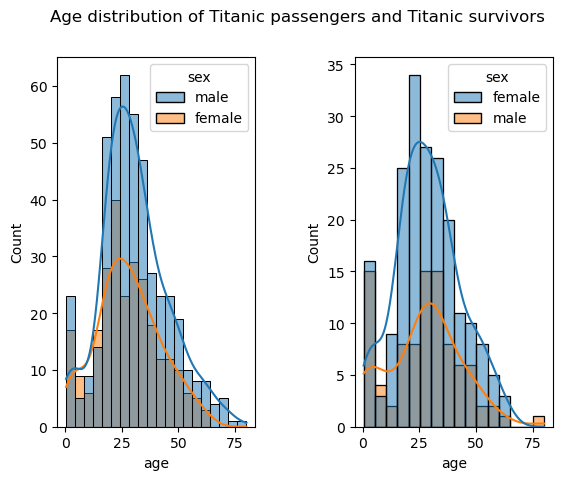

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=2)
sns.histplot(data=df,x='age',ax=ax[0],kde=True,hue='sex')
sns.histplot(data=survived, x='age',ax=ax[1],kde=True,hue='sex')

fig.suptitle('Age distribution of Titanic passengers and Titanic survivors')
fig.subplots_adjust(wspace=0.5)
plt.show()

In [7]:
df['age'].mean()

29.69911764705882

In [8]:
survived['age'].mean()

28.343689655172415

In [9]:
round(100 * len(df[df['sex'] == 'female']) / len(df),2)

35.24

In [10]:
# It seems that the ratio of female survived was a nearly double than the ratio of women on board (35 vs 68 %)
round(100 * len(survived[survived['sex'] == 'female']) / len(survived),2)

68.13

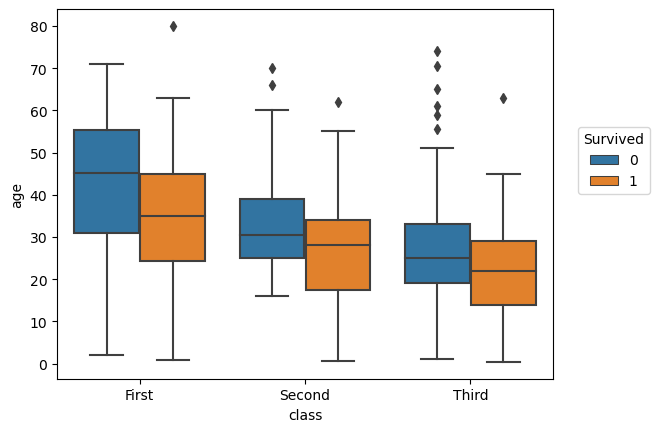

In [11]:
# Based on this boxplot it seems that in the first class, median age of survivors was a lot less than compared to other classes
# Also, it seems that the better the class, the higher the age. Maybe these people have had time to gather wealth?
sns.boxplot(data=df, y='age',x='class', hue='survived')
plt.legend(loc=(1.05,0.5),title='Survived')
plt.show()

### Feature Engineering

In [12]:
# Creating a new column, adult female since the dataset has also column adult male
df['adult_female'] = False
df.loc[(df['age'] > 18) & (df['sex'] == 'female'), 'adult_female'] = True

### Dealing with missing values and cleaning data

In [13]:
df.isnull().sum()

survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
who               0
adult_male        0
deck            688
embark_town       2
alive             0
alone             0
adult_female      0
dtype: int64

In [14]:
# Dropping embarked column since embark_town contains essentially the same information
df = df.drop('embarked', axis=1)

# Also dropping alive column because that does not help answering the question whether someone survived the accident or not :)
df = df.drop('alive', axis=1)

# .. And who column because it contains the same information as sex column
df = df.drop('who', axis=1)

# ... And pclass that contains same information as Class column
df = df.drop('pclass', axis=1)

In [15]:
df.isnull().sum()

survived          0
sex               0
age             177
sibsp             0
parch             0
fare              0
class             0
adult_male        0
deck            688
embark_town       2
alone             0
adult_female      0
dtype: int64

In [16]:
# Dropping out rows where embark town is NaN. Dropping out is probably fine because there are only two such rows.
df = df[df['embark_town'].notna()]

In [17]:
df.isna().sum()

survived          0
sex               0
age             177
sibsp             0
parch             0
fare              0
class             0
adult_male        0
deck            688
embark_town       0
alone             0
adult_female      0
dtype: int64

In [18]:
df.groupby('sex')['age'].mean()

sex
female    27.745174
male      30.726645
Name: age, dtype: float64

In [19]:
# Filling missing age values with the mean age's of that passengers gender, a quick and dirty method
df['age'] = df.groupby('sex')['age'].transform(lambda value: value.fillna(round(value.mean(),0)))

In [20]:
df.isna().sum()

survived          0
sex               0
age               0
sibsp             0
parch             0
fare              0
class             0
adult_male        0
deck            688
embark_town       0
alone             0
adult_female      0
dtype: int64

In [21]:
df['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [22]:
# Creating a new category Unknown which will be used to fill missing values in the deck column
df['deck'] = df['deck'].cat.add_categories(['Unknown'])
df['deck'] = df['deck'].fillna('Unknown')

In [23]:
df.isna().sum()

survived        0
sex             0
age             0
sibsp           0
parch           0
fare            0
class           0
adult_male      0
deck            0
embark_town     0
alone           0
adult_female    0
dtype: int64

In [24]:
df.head()

,survived,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town,alone,adult_female
0,0,male,22.0,1,0,7.2500,Third,True,Unknown,Southampton,False,False
1,1,female,38.0,1,0,71.2833,First,False,C,Cherbourg,False,True
2,1,female,26.0,0,0,7.9250,Third,False,Unknown,Southampton,True,True
3,1,female,35.0,1,0,53.1000,First,False,C,Southampton,False,True
4,0,male,35.0,0,0,8.0500,Third,True,Unknown,Southampton,True,False


In [25]:
df['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [26]:
df['sibsp'] = df['sibsp'].astype('object')
df['parch'] = df['parch'].astype('object')
df['adult_male'] = df['adult_male'].astype('int')
df['adult_female'] = df['adult_female'].astype('int')
df['alone'] = df['alone'].astype('int')

df.head()

,survived,sex,age,sibsp,parch,fare,class,adult_male,deck,embark_town,alone,adult_female
0,0,male,22.0,1,0,7.2500,Third,1,Unknown,Southampton,0,0
1,1,female,38.0,1,0,71.2833,First,0,C,Cherbourg,0,1
2,1,female,26.0,0,0,7.9250,Third,0,Unknown,Southampton,1,1
3,1,female,35.0,1,0,53.1000,First,0,C,Southampton,0,1
4,0,male,35.0,0,0,8.0500,Third,1,Unknown,Southampton,1,0


In [27]:
dum = pd.get_dummies(df.drop(columns=['survived', 'age', 'fare', 'adult_male', 'adult_female', 'alone']), drop_first=True, dtype='int')
dum.head()

,sex_male,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8,parch_1,parch_2,parch_3,...,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown,embark_town_Queenstown,embark_town_Southampton
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [28]:
df = pd.concat([df, dum], axis=1)
df = df.drop(columns=['sex', 'sibsp', 'parch', 'class', 'embark_town', 'deck'])

df.head()

,survived,age,fare,adult_male,alone,adult_female,sex_male,sibsp_1,sibsp_2,sibsp_3,...,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,7.2500,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,1
1,1,38.0,71.2833,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,1,35.0,53.1000,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,35.0,8.0500,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [29]:
df.head()

,survived,age,fare,adult_male,alone,adult_female,sex_male,sibsp_1,sibsp_2,sibsp_3,...,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_Unknown,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,7.2500,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,0,1
1,1,38.0,71.2833,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,26.0,7.9250,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
3,1,35.0,53.1000,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,35.0,8.0500,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1


### Train-test Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('survived', axis=1)
y = df['survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

### Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model = LogisticRegression()

In [38]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [39]:
y_predictions = log_model.predict(scaled_X_test)

### Logistic Regression Model Accuracy

In [40]:
log_model.coef_

array([[-1.5573021 ,  0.41599769, -2.02068843,  0.48362129,  0.21260326,
        -0.68089254,  0.44228059,  0.25286394, -0.9664694 , -1.31340349,
        -0.83004883, -0.86254934,  0.1747322 , -0.00633061,  0.09829927,
        -0.78029353, -0.58145178, -0.43269145, -0.12962632, -1.21147942,
         0.04813703, -0.05457075,  0.65407675,  0.77817441, -0.10973468,
        -0.20547743, -0.75550363, -0.18257964, -0.62986284]])

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [42]:
accuracy_score(y_true=y_test, y_pred=y_predictions)

0.8283582089552238

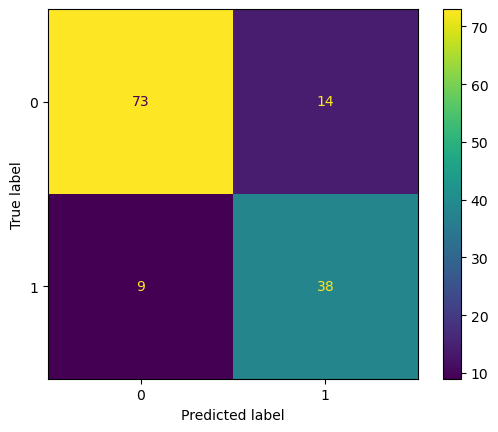

In [44]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [45]:
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        87
           1       0.73      0.81      0.77        47

    accuracy                           0.83       134
   macro avg       0.81      0.82      0.82       134
weighted avg       0.83      0.83      0.83       134



In [46]:
from sklearn.metrics import RocCurveDisplay

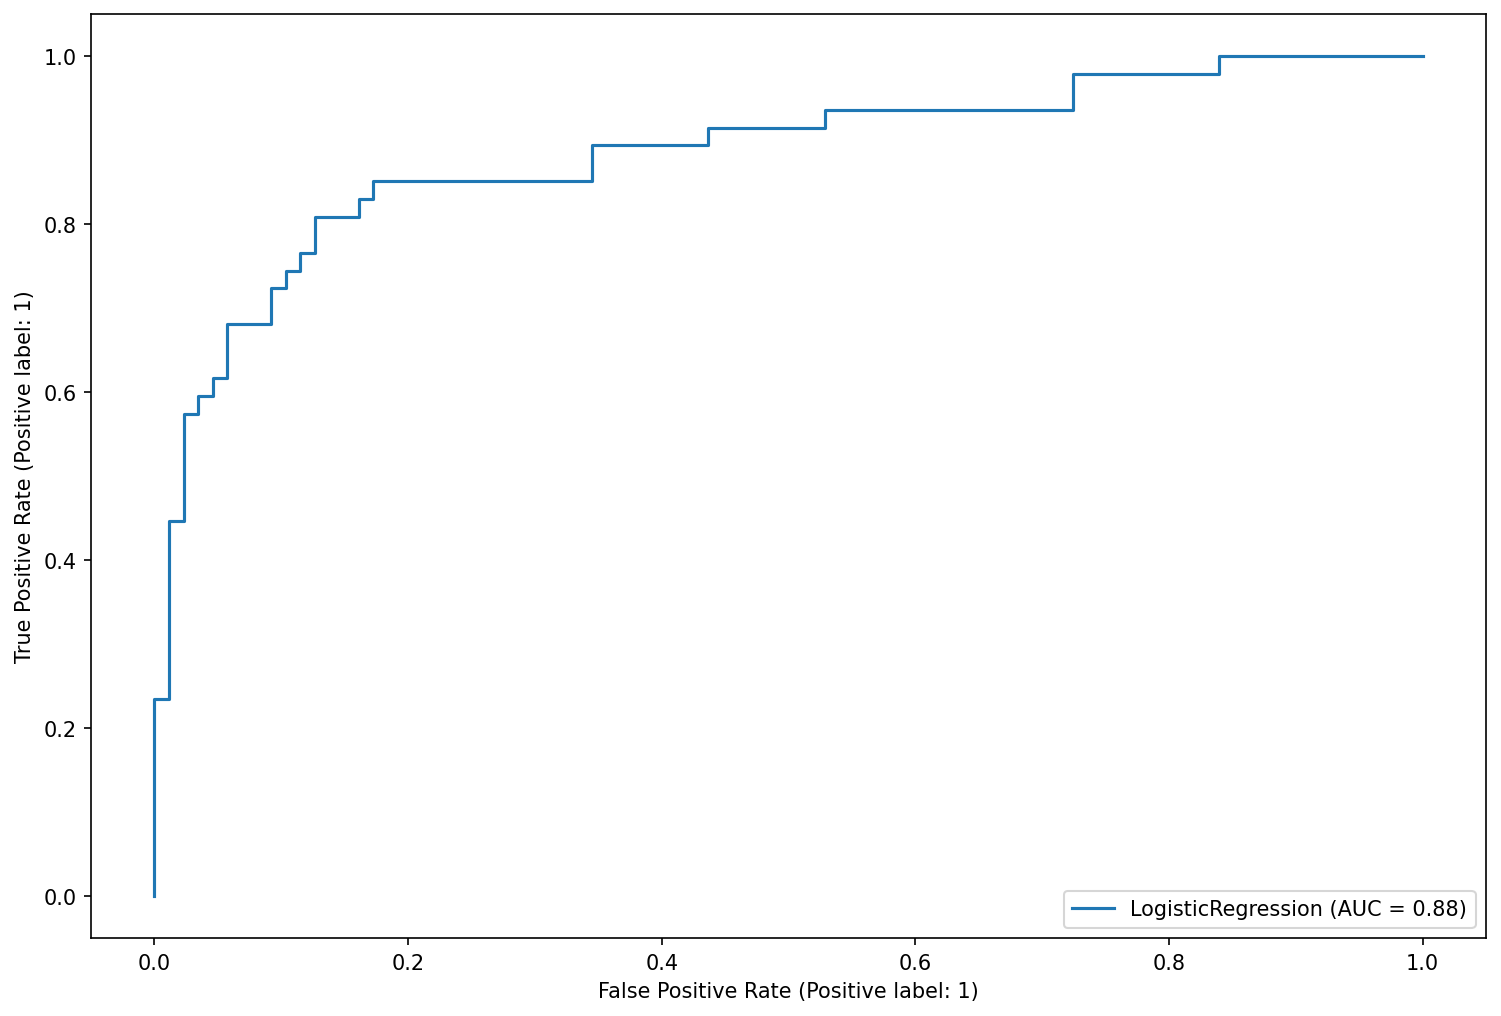

In [47]:
fig, ax = plt.subplots(figsize=(12,8), dpi=150)
RocCurveDisplay.from_estimator(estimator=log_model, X=scaled_X_test, y=y_test, ax=ax)
plt.show()

#### Grid Search + Decision Tree Classifier

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [49]:
decision_tree_model = DecisionTreeClassifier()

In [50]:
decision_tree_param_grid = {'class_weight':['balanced', None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'max_features': [None, 'sqrt', 'log2']}

In [51]:
dc_model = GridSearchCV(decision_tree_model, decision_tree_param_grid)

In [52]:
dc_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [53]:
dc_predictions = dc_model.predict(X_test)

In [54]:
print(classification_report(y_test, dc_predictions))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        87
           1       0.69      0.79      0.73        47

    accuracy                           0.80       134
   macro avg       0.78      0.80      0.79       134
weighted avg       0.81      0.80      0.80       134



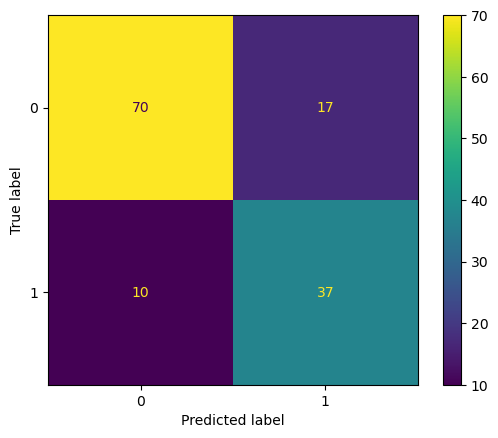

In [55]:
ConfusionMatrixDisplay.from_estimator(dc_model, X_test, y_test)

No improvement in performance with DecisionTreeClassifier

In [56]:
feat_array = dc_model.best_estimator_.feature_importances_
dc_feat_importances = pd.Series(data=feat_array, index=X.columns)
dc_feat_importances = dc_feat_importances.sort_values()
dc_feat_importances = dc_feat_importances.to_frame()
dc_feat_importances.index.name = 'Feature'
dc_feat_importances.columns = ['Feature Importance']
dc_feat_importances = dc_feat_importances.reset_index()

dc_feat_importances

,Feature,Feature Importance
0,parch_3,0.000000
1,parch_6,0.000000
2,parch_5,0.000000
3,parch_4,0.000000
4,sibsp_8,0.000000
5,sibsp_5,0.000000
6,deck_G,0.000000
7,sex_male,0.000000
8,embark_town_Queenstown,0.001060
9,class_Second,0.001876


However, it seems that being an adult male clearly is by far the best predictor to determine one's survival

### Random Forest Prediction

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_param_grid = {
    'n_estimators': [64, 100, 150, 200],
    'max_features':[2, 3, 4, 5],
    'bootstrap': [True, False],  
    'oob_score': [True, False]
}

In [59]:
rfc_base = RandomForestClassifier()

In [60]:
rf_grid_model = GridSearchCV(rfc_base, rf_param_grid, verbose=1)

In [61]:
# This code will cause some warnings because of the GridSearch so we can ignore them
import warnings
warnings.filterwarnings('ignore')

rf_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [2, 3, 4, 5],
                         'n_estimators': [64, 100, 150, 200],
                         'oob_score': [True, False]},
             verbose=1)

In [62]:
rf_grid_model.best_estimator_

RandomForestClassifier(max_features=5, n_estimators=64, oob_score=True)

In [63]:
rfc_predictions = rf_grid_model.predict(X_test)

In [64]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        87
           1       0.68      0.72      0.70        47

    accuracy                           0.78       134
   macro avg       0.76      0.77      0.77       134
weighted avg       0.79      0.78      0.79       134



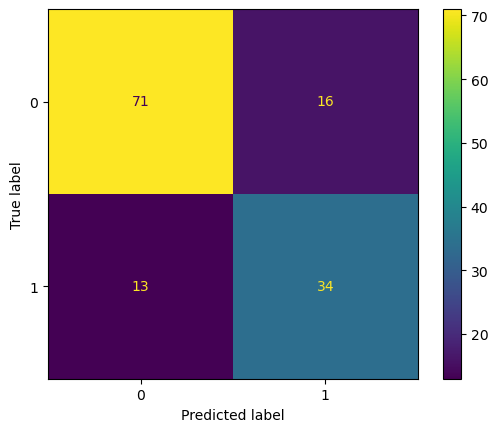

In [65]:
ConfusionMatrixDisplay.from_estimator(rf_grid_model, X_test, y_test)

### Using Boosted Trees

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
gbc_model = GradientBoostingClassifier()

In [68]:
gbc_parameter_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate (shrinkage) of each tree
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
}

In [69]:
gbc_grid_model = GridSearchCV(gbc_model, gbc_parameter_grid, verbose=10)

In [70]:
gbc_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5; 1/36] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 1/5; 1/36] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.781 total time=   0.0s
[CV 2/5; 1/36] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 2/5; 1/36] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.781 total time=   0.0s
[CV 3/5; 1/36] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 3/5; 1/36] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.828 total time=   0.0s
[CV 4/5; 1/36] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 4/5; 1/36] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.781 total time=   0.0s
[CV 5/5; 1/36] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 5/5; 1/36] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.795 total time=   0.0s
[CV 1/5; 2/36] START learnin

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             verbose=10)

In [71]:
gbc_grid_model.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, n_estimators=150)

In [72]:
gbc_predictions = gbc_grid_model.predict(X_test)

In [73]:
print(classification_report(y_test, gbc_predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        87
           1       0.74      0.74      0.74        47

    accuracy                           0.82       134
   macro avg       0.80      0.80      0.80       134
weighted avg       0.82      0.82      0.82       134



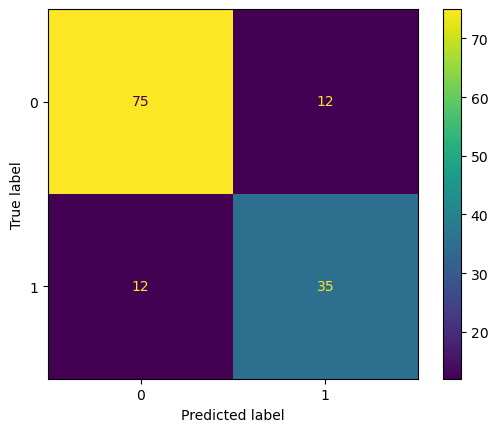

In [74]:
ConfusionMatrixDisplay.from_estimator(gbc_grid_model, X_test, y_test)

### Prediction using Deep Learning (Tensorflow and Keras)

In [75]:
X = df.drop('survived', axis=1).values
y = df['survived'].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [77]:
scaler = MinMaxScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
from tensorflow.keras.models import Sequential

In [80]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
X_train.shape

(755, 29)

In [82]:
dl_model = Sequential()

# Input layer should have 29 neurons (= total number of features)
dl_model.add(Dense(29, activation='relu'))
dl_model.add(Dropout(rate=0.5))

dl_model.add(Dense(15, activation='relu'))
dl_model.add(Dropout(rate=0.5))

dl_model.add(Dense(7, activation='relu'))
dl_model.add(Dropout(rate=0.5))

# Binary classification problem so sigmoid is the activation function for the output layer
dl_model.add(Dense(1, activation='sigmoid'))

dl_model.compile(loss='binary_crossentropy', optimizer='adam')

In [83]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=10)

In [84]:
# Choosing intentionally a high number of epochs and let the Early Stopping determine the eventual number
dl_model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/500
24/24 [==============================] - 2s 21ms/step - loss: 0.8073 - val_loss: 0.7016
Epoch 2/500
24/24 [==============================] - 0s 13ms/step - loss: 0.7383 - val_loss: 0.6850
Epoch 3/500
24/24 [==============================] - 0s 12ms/step - loss: 0.7107 - val_loss: 0.6747
Epoch 4/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6936 - val_loss: 0.6688
Epoch 5/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6922 - val_loss: 0.6659
Epoch 6/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6808 - val_loss: 0.6625
Epoch 7/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6750 - val_loss: 0.6593
Epoch 8/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6741 - val_loss: 0.6566
Epoch 9/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6588 - val_loss: 0.6517
Epoch 10/500
24/24 [==============================] - 0s 12ms/step - loss: 0.6689 - val_loss: 0.6467

<Axes: >

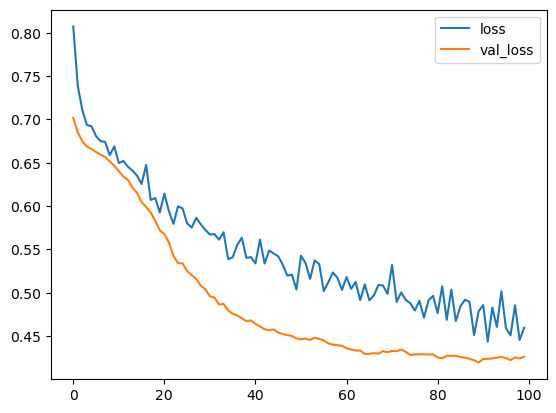

In [85]:
pd.DataFrame(dl_model.history.history).plot()

In [86]:
predictions = (dl_model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [87]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        87
           1       0.82      0.68      0.74        47

    accuracy                           0.84       134
   macro avg       0.83      0.80      0.81       134
weighted avg       0.83      0.84      0.83       134



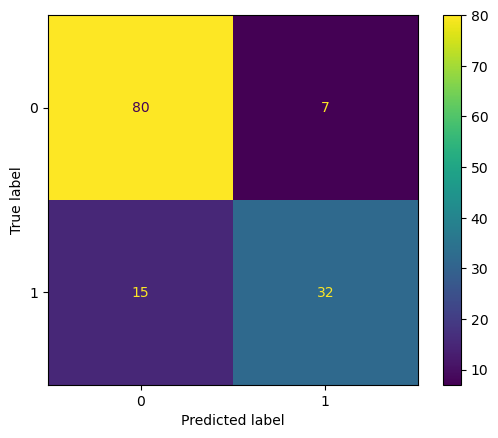

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)

Verdict: good old logistic regression peformed fine in this little project. Performance between different models was pretty similar.